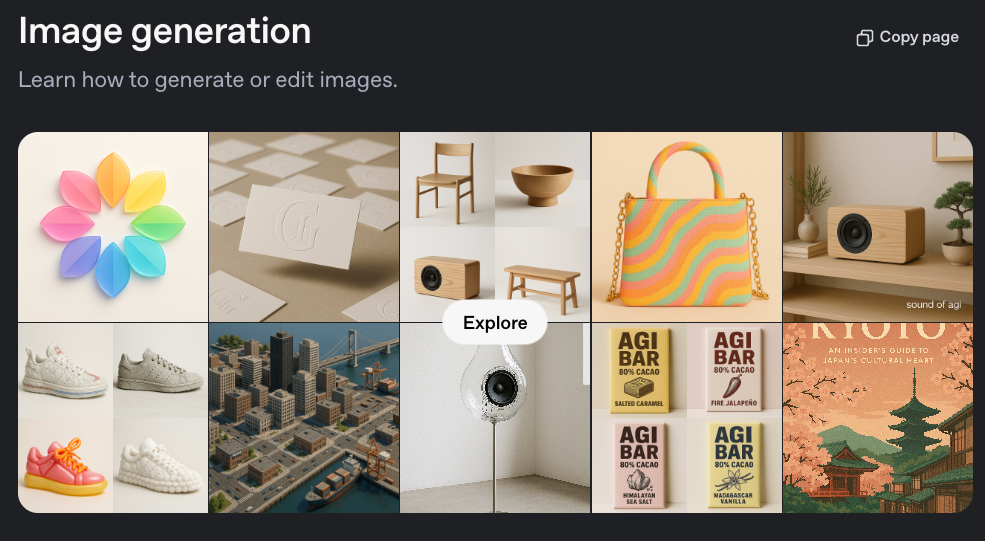

https://platform.openai.com/docs/guides/image-generation?image-generation-model=gpt-image-1

In [2]:
import IPython
import sys

def clean_notebook():
    IPython.display.clear_output(wait=True)
    print("Notebook cleaned.")

!pip install openai
!pip install gradio

# Clean up the notebook
clean_notebook()

Notebook cleaned.


In [2]:
import os
from openai import OpenAI
from dotenv import load_dotenv

# Load environment variables
load_dotenv()

True

# Streaming  Mode

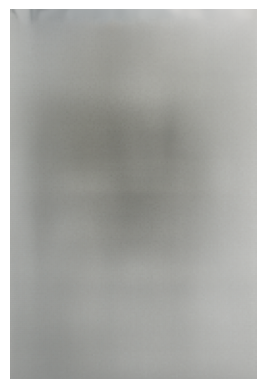

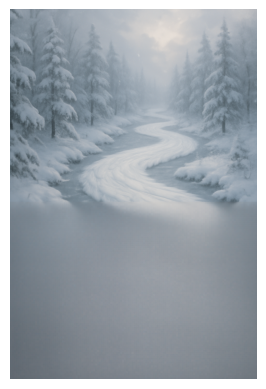

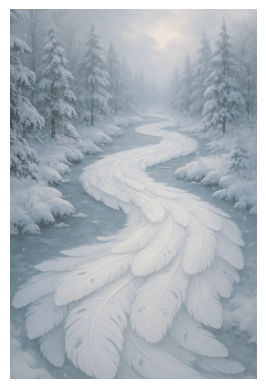

In [2]:
import base64
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
from openai import OpenAI


client = OpenAI()

stream = client.responses.create(
    model="gpt-4.1",
    input="Draw a gorgeous image of a river made of white owl feathers, snaking its way through a serene winter landscape",
    stream=True,
    tools=[{"type": "image_generation", "partial_images": 2}],
)

for event in stream:
    if event.type == "response.image_generation_call.partial_image":
        idx = event.partial_image_index
        image_base64 = event.partial_image_b64
        image_bytes = base64.b64decode(image_base64)
        image = Image.open(BytesIO(image_bytes))
        # Display the image
        plt.imshow(image)
        plt.axis('off')
        plt.show()

# Batch processing

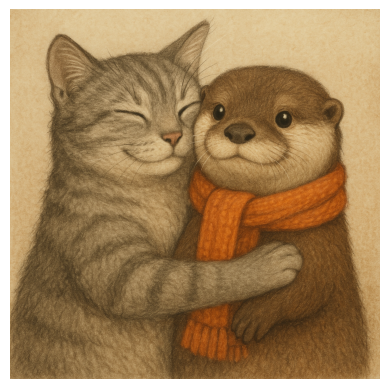

In [ ]:
import os
import base64
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
from openai import OpenAI

# Initialize OpenAI client with API key
openai_client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

# Generate an image
response = openai_client.images.generate(
    model="gpt-image-1",  # "dall-e-1" or "dall-e-2", "gpt-image-1"
    prompt="A gray tabby cat hugging an otter wearing an orange scarf",
    size="1024x1024",
    quality="high",   # Use 'low', 'medium', 'high', or 'auto'
    n=1
)

# Decode the base64 image
image_base64 = response.data[0].b64_json
image_bytes = base64.b64decode(image_base64)
image = Image.open(BytesIO(image_bytes))

# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()


# Compare image generation models with 3 prompts



In [33]:
import os
import base64
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
from openai import OpenAI

# Initialize OpenAI client with API key
openai_client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

# Define your 3 prompts
prompts = [
    "A fluffy white cat wearing sunglasses sitting on a windowsill",
    "A scenic view of Bangkok with boats on the Chao Phraya River at sunset",
    "A cartoon-style cat riding a tuk-tuk in Bangkok"
]

# Store generated images
images = []

# Generate and decode images for each prompt
for prompt in prompts:
    response = openai_client.images.generate(
        model="gpt-image-1",  # Use "gpt-image-1" for current image model
        prompt=prompt,
        size="1024x1024",
        quality="high",  # Options: "low", "medium", "high", or "auto"
        n=1
    )
    image_base64 = response.data[0].b64_json
    image_bytes = base64.b64decode(image_base64)
    image = Image.open(BytesIO(image_bytes))
    images.append(image)



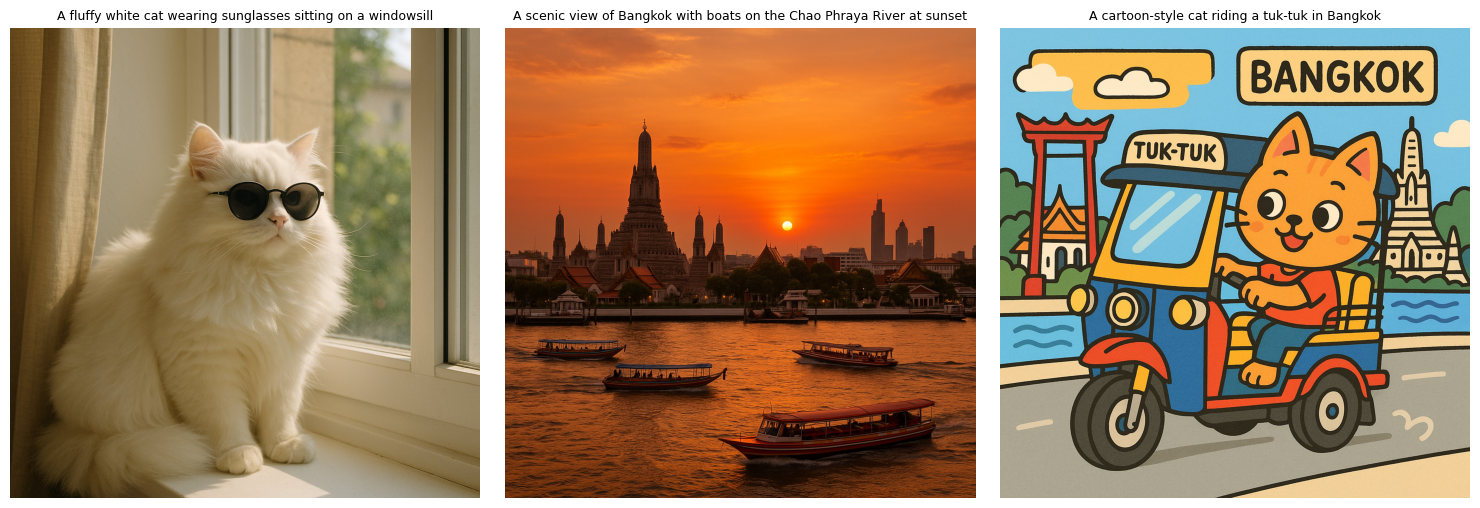

In [36]:

# Display images with matplotlib
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for ax, img, title in zip(axes, images, prompts):
    ax.imshow(img)
    ax.set_title(title, fontsize=9)
    ax.axis('off')

plt.tight_layout()
plt.show()

# Combine picture

In [16]:
from openai import OpenAI
import base64


def encode_image(image_path):
    """Helper function to encode image to base64"""
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')
    

def create_file(file_path):
  with open(file_path, "rb") as file_content:
    result = client.files.create(
        file=file_content,
        purpose="vision",
    )
    return result.id


client = OpenAI()


# Test Prompt 1

In [21]:

prompt = """Generate a image of a room on a white background 
labeled 'วิชาสร้างภาพ AI4BA' with a ribbon and handwriting-like font, 
containing all the items in the reference pictures."""

# Test Prompt 2

In [28]:
prompt = """Generate an image of market with  labeled 'วิชาสร้างภาพ AI4BA' with a ribbon and handwriting-like font. 
a view of the Chao Phraya River behide. 
"""

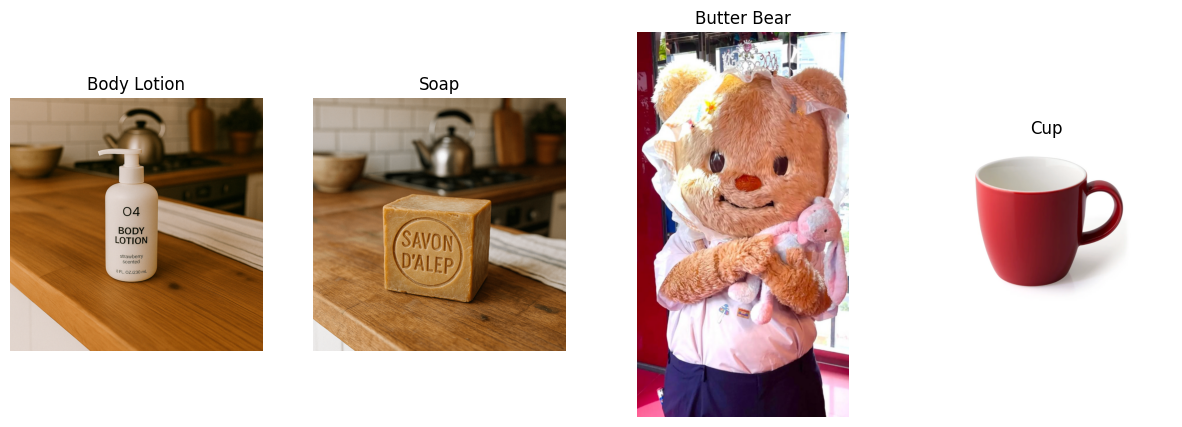

In [29]:


base64_image1 = encode_image("body-lotion.png")
base64_image2 = encode_image("soap.png")
base64_image3 = encode_image("butter_bear01.png")
base64_image4 = encode_image("cup01.png")



# List of image paths and titles
images_info = [
    ("body-lotion.png", "Body Lotion"),
    ("soap.png", "Soap"),
    ("butter_bear01.png", "Butter Bear"),
    ("cup01.png", "Cup")
]

# Encode images and load them for display
encoded_images = []
loaded_images = []

for img_path, _ in images_info:
    encoded_images.append(encode_image(img_path))
    loaded_images.append(Image.open(img_path))

# Plot the images (only showing 3 as in your original code)
plt.figure(figsize=(15, 5))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(loaded_images[i])
    plt.axis('off')
    plt.title(images_info[i][1])

plt.show()

In [30]:

response = client.responses.create(
    model="gpt-4.1",
    input=[
        {
            "role": "user",
            "content": [
                {"type": "input_text", "text": prompt},
                {
                    "type": "input_image",
                    "image_url": f"data:image/jpeg;base64,{base64_image1}",
                },
                {
                    "type": "input_image",
                    "image_url": f"data:image/jpeg;base64,{base64_image2}",
                },
                {
                    "type": "input_image",
                    "image_url": f"data:image/jpeg;base64,{base64_image3}",
                },
 {
                    "type": "input_image",
                    "image_url": f"data:image/jpeg;base64,{base64_image4}",
                },
            
             
            ],
        }
    ],
    tools=[{"type": "image_generation"}],
)

image_generation_calls = [
    output
    for output in response.output
    if output.type == "image_generation_call"
]

image_data = [output.result for output in image_generation_calls]

if image_data:
    image_base64 = image_data[0]
    # Save the image to a file
    with open("gift-basket.png", "wb") as f:
        f.write(base64.b64decode(image_base64)) 
else:
    print(response.output.content)

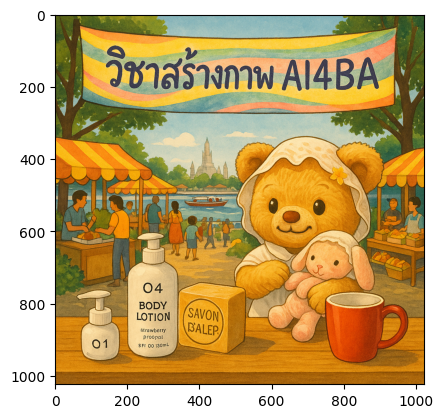

In [31]:
from PIL import Image
from io import BytesIO
import base64
import matplotlib.pyplot as plt

image_bytes = base64.b64decode(image_base64)
image = Image.open(BytesIO(image_bytes))
plt.imshow(image)     

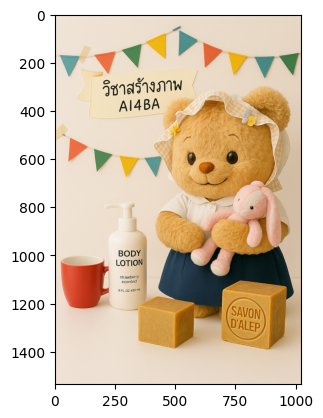

In [24]:
from PIL import Image
from io import BytesIO
import base64
import matplotlib.pyplot as plt

image_bytes = base64.b64decode(image_base64)
image = Image.open(BytesIO(image_bytes))
plt.imshow(image)     